# Introduction: Getting Started with SVM
In this notebook, we explain to download the dataset and getting started with all the predictive tasks using Support Vector Machine. We will be extracting spectral features, specifically 6 rhythmic features - total power in 6 frequency bands, namely, Delta (0.5-4 Hz), Theta (4-8 Hz), Alpha (8-14 Hz), Beta (14-30 Hz), Low Gamma (30-47 Hz), and High Gamma (47-64 Hz). For preprocessing, we filter EEG first with 0.5 Hz highpass and then remove Artifact with ICA based approach. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download Data</a></span></li><li><span><a href="#Locate-the-subject's-file" data-toc-modified-id="Locate-the-subject's-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Locate the subject's file</a></span></li><li><span><a href="#Loading-data-and-preprocessing" data-toc-modified-id="Loading-data-and-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading data and preprocessing</a></span><ul class="toc-item"><li><span><a href="#Create-Subj-(obj)-with-data-of-Subject=1" data-toc-modified-id="Create-Subj-(obj)-with-data-of-Subject=1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create Subj (obj) with data of Subject=1</a></span></li><li><span><a href="#Filtering---removing-DC" data-toc-modified-id="Filtering---removing-DC-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Filtering - removing DC</a></span></li><li><span><a href="#Artifact-removal-using-ICA--[-~6mins]" data-toc-modified-id="Artifact-removal-using-ICA--[-~6mins]-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Artifact removal using ICA  [ ~6mins]</a></span></li></ul></li><li><span><a href="#Feature-Extraction---Rhythmic-Features-[~2min]" data-toc-modified-id="Feature-Extraction---Rhythmic-Features-[~2min]-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Extraction - Rhythmic Features [~2min]</a></span></li><li><span><a href="#Predictive-Modeling-with-SVM" data-toc-modified-id="Predictive-Modeling-with-SVM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predictive Modeling with SVM</a></span><ul class="toc-item"><li><span><a href="#T4-Task:-LWR-classification" data-toc-modified-id="T4-Task:-LWR-classification-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>T4 Task: LWR classification</a></span></li><li><span><a href="#T3-Task:-Semanticity-classification" data-toc-modified-id="T3-Task:-Semanticity-classification-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>T3 Task: Semanticity classification</a></span></li><li><span><a href="#T2-Task:-Noise-level-prediction-:-Regression" data-toc-modified-id="T2-Task:-Noise-level-prediction-:-Regression-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>T2 Task: Noise level prediction : Regression</a></span></li><li><span><a href="#T1-Task:-Attention-Level-prediction:--Regression" data-toc-modified-id="T1-Task:-Attention-Level-prediction:--Regression-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>T1 Task: Attention Level prediction:  Regression</a></span></li></ul></li><li><span><a href="#All-results" data-toc-modified-id="All-results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>All results</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pip install phyaat  # if not installed yet

import phyaat
print('Version :' ,phyaat.__version__)
import phyaat as ph

PhyAAt Processing lib Loaded...
Version : 0.0.2


## Download Data

In [3]:
# Download dataset of one subject only (subject=1)
# To download data of all the subjects use subject =-1 or for specify for one e.g.subject=10

dirPath = ph.download_data(baseDir='../PhyAAt_Data', subject=1,verbose=0,overwrite=False)

## Locate the subject's file

In [5]:
baseDir='../PhyAAt_Data'   # or dirPath return path from above

#returns a dictionary containing file names of all the subjects available in baseDir
SubID = ph.ReadFilesPath(baseDir) 

#check files of subject=1
SubID[1]

Total Subjects :  1


{'sigFile': '../PhyAAt_Data/phyaat_dataset/Signals/S1/S1_Signals.csv',
 'txtFile': '../PhyAAt_Data/phyaat_dataset/Signals/S1/S1_Textscore.csv'}

## Loading data and preprocessing

### Create Subj (obj) with data of Subject=1

In [6]:
# Create a Subj holding dataset of subject=1

Subj = ph.Subject(SubID[1])

### Filtering - removing DC

In [8]:
#filtering with highpass filter of cutoff frequency 0.5Hz

Subj.filter_EEG(band =[0.5],btype='highpass',order=5)

### Artifact removal using ICA  [ ~6mins]

In [9]:
#Remving Artifact using ICA, setting window size to 1280 (10sec), which is larg, but takes less time

Subj.correct(method='ICA',verbose=1,winsize=128*10) 

ICA Artifact Removal : extended-infomax
100%|####################################################################################################|


## Feature Extraction - Rhythmic Features [~2min]

In [10]:
# setting task=-1, does extract the features from all the segmensts for all the four tasks and 
# returns y_train as (n,4), one coulum for each task. Next time extracting Xy for any particular
# task won't extract the features agains, unless you force it by setting 'redo'=True.

X_train,y_train,X_test, y_test = Subj.getXy_eeg(task=-1)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)

100%|##################################################|100\100|Sg - 0
Done..
100%|##################################################|100\100|Sg - 1
Done..
100%|##################################################|100\100|Sg - 2
Done..
100%|##################################################|43\43|Sg - 0
Done..
100%|##################################################|43\43|Sg - 1
Done..
100%|##################################################|43\43|Sg - 2
Done..
DataShape:  (290, 84) (290, 4) (120, 84) (120, 4)


## Predictive Modeling with SVM

In [11]:
from sklearn import svm

### T4 Task: LWR classification

In [12]:
X_train,y_train, X_test,y_test = Subj.getXy_eeg(task=4)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)
print('\nClass labels :',np.unique(y_train))

DataShape:  (290, 84) (290,) (120, 84) (120,)

Class labels : [0 1 2]


In [13]:
# Normalization - SVM works well with normalized features
means = X_train.mean(0)
std   = X_train.std(0)
X_train = (X_train-means)/std
X_test  = (X_test-means)/std


# Training
clf = svm.SVC(kernel='rbf', C=1,gamma='auto')
clf.fit(X_train,y_train)

# Predition
ytp = clf.predict(X_train)
ysp = clf.predict(X_test)

# Evaluation
T4_trac =  np.mean(y_train==ytp)
T4_tsac =  np.mean(y_test==ysp)
print('Training Accuracy:',T4_trac)
print('Testing  Accuracy:',T4_tsac)

Training Accuracy: 0.9551724137931035
Testing  Accuracy: 0.875


### T3 Task: Semanticity classification

In [14]:
X_train,y_train, X_test,y_test = Subj.getXy_eeg(task=3)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)
print('\nClass labels :',np.unique(y_train))

DataShape:  (100, 84) (100,) (43, 84) (43,)

Class labels : [0 1]


In [15]:
# Normalization - SVM works well with normalized features
means = X_train.mean(0)
std   = X_train.std(0)
X_train = (X_train-means)/std
X_test  = (X_test-means)/std


# Training
clf = svm.SVC(kernel='rbf', C=1,gamma='auto')
clf.fit(X_train,y_train)

# Predition
ytp = clf.predict(X_train)
ysp = clf.predict(X_test)


# Evaluation
T3_trac =  np.mean(y_train==ytp)
T3_tsac =  np.mean(y_test==ysp)
print('Training Accuracy:',T3_trac)
print('Testing  Accuracy:',T3_tsac)

Training Accuracy: 0.86
Testing  Accuracy: 0.6046511627906976


### T2 Task: Noise level prediction : Regression

In [16]:
X_train,y_train, X_test,y_test = Subj.getXy_eeg(task=2)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)
print('\nNoise levels     :',np.unique(y_train))

#change 1000 dB to 10 dB
y_train[y_train==1000]=10
y_test[y_test==1000]=10

print('New Noise levels :',np.unique(y_train))

DataShape:  (100, 84) (100,) (43, 84) (43,)

Noise levels     : [  -6   -3    0    3    6 1000]
New Noise levels : [-6 -3  0  3  6 10]


In [17]:
# Normalization - SVM works well with normalized features
means = X_train.mean(0)
std   = X_train.std(0)
X_train = (X_train-means)/std
X_test  = (X_test-means)/std


# Training
clf = svm.SVR(kernel='rbf', C=1,gamma='auto')
clf.fit(X_train,y_train)

# Predition
ytp = clf.predict(X_train)
ysp = clf.predict(X_test)

# Evaluation
T2_tre =  np.mean(np.abs(y_train-ytp))
T2_tse =  np.mean(np.abs(y_test-ysp))
print('Training MAE:',T2_tre)
print('Testing  MAE:',T2_tse)

Training MAE: 3.9959210189119596
Testing  MAE: 4.692983467091375


### T1 Task: Attention Level prediction:  Regression

In [18]:
X_train,y_train, X_test,y_test = Subj.getXy_eeg(task=1)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)
print('\nAttention levels:\n',np.unique(y_train))

# Round off around 10

y_train = 10*(y_train//10)
y_test = 10*(y_test//10)

print('\nNew Attention levels:\n',np.unique(y_train))

DataShape:  (100, 84) (100,) (43, 84) (43,)

Attention levels:
 [  0   7  12  14  15  18  20  22  25  28  33  37  38  42  44  45  46  50
  54  60  62  66  71  72  75  76  80  83  85  87  88 100]

New Attention levels:
 [  0  10  20  30  40  50  60  70  80 100]


In [19]:
# Normalization - SVM works well with normalized features
means = X_train.mean(0)
std   = X_train.std(0)
X_train = (X_train-means)/std
X_test  = (X_test-means)/std


# Training
clf = svm.SVR(kernel='rbf', C=1,gamma='auto')
clf.fit(X_train,y_train)

# Predition
ytp = clf.predict(X_train)
ysp = clf.predict(X_test)

# Evaluation
T1_tre =  np.mean(np.abs(y_train-ytp))
T1_tse =  np.mean(np.abs(y_test-ysp))
print('Training MAE:',T1_tre)
print('Testing  MAE:',T1_tse)

Training MAE: 30.318536004889328
Testing  MAE: 32.7156301374038


## All results

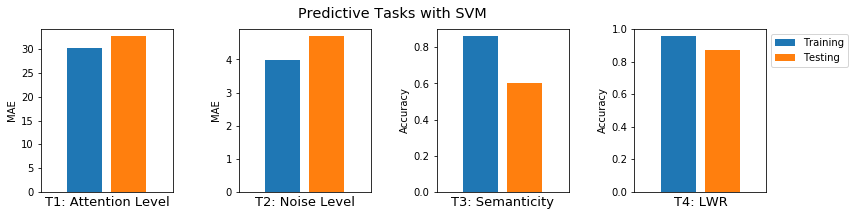

In [55]:
fig = plt.figure(figsize=(13,3))
plt.subplot(141)
plt.bar(1, [T1_tre])
plt.bar(2, [T1_tse])
plt.xlim([0,3])
plt.xticks([])
plt.xlabel('T1: Attention Level',fontsize=13)
plt.ylabel('MAE')

plt.subplot(142)
plt.bar(1, [T2_tre])
plt.bar(2, [T2_tse])
plt.xticks([])
plt.xlabel('T2: Noise Level',fontsize=13)
plt.ylabel('MAE')


plt.xlim([0,3])
plt.subplot(143)
plt.bar(1, [T3_trac])
plt.bar(2, [T3_tsac])
plt.xticks([])
plt.xlabel('T3: Semanticity',fontsize=13)
plt.ylabel('Accuracy')

plt.xlim([0,3])
plt.subplot(144)
plt.bar(1, [T4_trac],label='Training')
plt.bar(2, [T4_tsac],label='Testing')
plt.xlim([0,3])
plt.xticks([])
plt.xlabel('T4: LWR',fontsize=13)
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1,1))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("Predictive Tasks with SVM", fontsize="x-large")
plt.show()